
# LAB04 - Informed Search



**Objective:** Students will practice


*   To program the algorithms of informed searchs in Python.
*   Converting the state space of the problem into Python graph.
*   Adapting Best-First search and A* search for searching the problem goal.






**Lab Instruction**

---

*   The **LAB04** instruction and lab resources are shared in the CMU Mango platform. 
*   *   There are **2 assignments** according to the **LAB04** sheet posted on the channel.
*   The **LAB04** is worth **25 points** in total.

---

**Assignment Submission:**
Once you have done all assignment,
*   Goto: File --> Download --> Download .ipynb
*   Save the filename as **[your_student_ID]_inclass.ipynb** for the work that you finished in the class
*   Save the filename as **[your_student_ID]_outclass.ipynb** for the work that you finished after the class
*   Upload your code files to CMU Mango assignments. The submission later than the ‘due date’ will get 50% off your score. You cannot submit your work to the system at the close date.
>*   **Be careful**: The uploaded time will be checked. If you replace the inclass file on the later upload, you score will be graded by the uploaded time.




# goal_test()

*goal_test()* function is added to the algorithm to check if the travelling of the algorithm has arrived to the GOAL state on the tree.

In [1]:

def goal_test(goal_node, node):
    if node == goal_node:
      return True
    return False


def dfs(Graph, initial_node, goal_node):
    visit = []
    stack = [initial_node]
    while stack:
        node = stack.pop()
        if node not in visit:
            visit.append(node)
            if goal_test(goal_node, node):
              return visit
            stack.extend(Graph[node])
    return visit


graph = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}

print (dfs(graph, 'A', 'F'))

['A', 'C', 'F']


**Assignment 1 [5 points]**: reuse the graph of Romania map that you developed in LAB03-UninformedSearch. Excute the DFS with goal test for the initial node of 'Arad' to the destination node of 'Bucharest'.

In [4]:
## Implement your code for assignment 1 here...
# 3.Convert the Romania map to your own 'romania_map' dictionary. (one-way left to right) (use the city name as the node state) here:

romania_map = {
    'Arad'          : ['Zerind' , 'Sibiu', 'Timisoara'],
    'Zerind'        : ['Arad'   , 'Oradea'],
    'Oradea'        : ['Zerind' , 'Sibiu'],
    'Sibiu'         : ['Arad'   , 'Oradea', 'Fagaras', 'Rimnicu Vilcea'],
    'Fagaras'       : ['Sibiu'  , 'Bucharest'],
    'Rimnicu Vilcea': ['Sibiu'  , 'Pitesti', 'Craiova'],
    'Pitesti'       : ['Rimnicu Vilcea', 'Bucharest', 'Craiova'],
    'Timisoara'     : ['Arad'   , 'Lugoj'],
    'Lugoj'         : ['Timisoara','Mehadia'],
    'Mehadia'       : ['Lugoj'  , 'Dobreta'],
    'Dobreta'       : ['Mehadia', 'Craiova'],
    'Craiova'       : ['Dobreta', 'Rimnicu Vilcea', 'Pitesti'],
    'Bucharest'     : ['Fagaras', 'Pitesti', 'Giurgiu', 'Urziceni'],
    'Giurgiu'       : ['Bucharest'],
    'Urziceni'      : ['Bucharest', 'Hirsova', 'Vaslui'],
    'Hirsova'       : ['Urziceni', 'Eforie'],
    'Eforie'        : ['Hirsova'],
    'Vaslui'        : ['Urziceni', 'Iasi'],
    'Iasi'          : ['Vaslui'  , 'Neamt'],
    'Neamt'         : ['Iasi']
}

print(dfs(romania_map, 'Arad', 'Bucharest'))


['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Dobreta', 'Craiova', 'Pitesti', 'Bucharest']


# Greedy Best-First Search

# ***TO DO***:
1. Study how the 'graph' is converted from the tree. Notice that the list is differnt from the list created for the uninformed search problems.
2. Execute the code given for the example 'graph' below. 
3. The given code added nodes from node_id[1] to node_id[5]. You have to add the remaining nodes to complete till node_id[13].
4. Read the psudocode of the greedy best-first search to get understand how the algorithm works with the given python code.
5. Excute the greedy best-first search for the graph.
4. Convert the Romania map to your own 'romania_map' (the graph should be different from the assignment1). Use the Function cost of Straight Line Distance given in the picture.

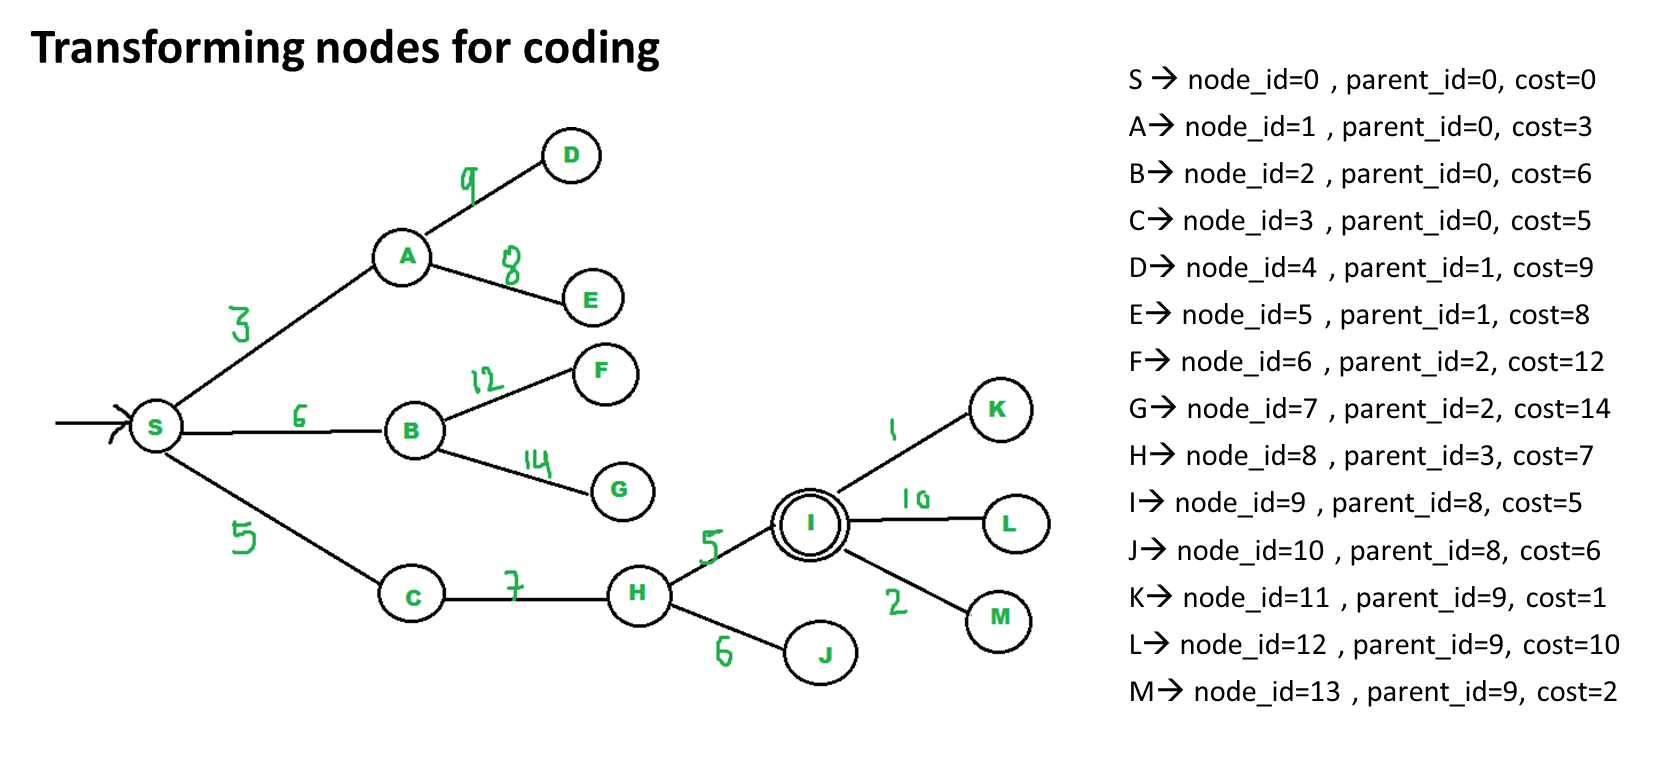

In [10]:
# 1.Study how the 'graph' is converted by the function from the tree above.
# 2.Try executing the code of 'graph' below

from queue import PriorityQueue
v = 14
graph = [[] for i in range(v)]

# Function 'addnode' for adding nodes to the 'graph'
def addnode(_graph, parent_id, node_id, cost):
    _graph[parent_id].append((node_id, cost))
    _graph[node_id].append((parent_id, cost))




***Modify graph nodes here***

In [11]:
# The nodes shown in above example(by alphabets) are
# implemented using integers addnode(parent_id, node_id, cost);

# call 'addnode' to add nodes the graph
addnode(graph, 0, 1, 3)
addnode(graph, 0, 2, 6)
addnode(graph, 0, 3, 5)
addnode(graph, 1, 4, 9)
addnode(graph, 1, 5, 8)

## add the remaining nodes here...
addnode(graph, 2, 6, 12)
addnode(graph, 2, 7, 14)
addnode(graph, 3, 8, 7)
addnode(graph, 8, 9, 5)
addnode(graph, 8, 10, 6)
addnode(graph, 9, 11, 1)
addnode(graph, 9, 12, 10)
addnode(graph, 9, 13, 2)

print(graph)

# data in each array list contains information of childern nodes
# e.g. node 0 contains [(1, 3), (2, 6), (3, 5)] --> list of children nodes and cost of travelling to each node

[[(1, 3), (2, 6), (3, 5)], [(0, 3), (4, 9), (5, 8)], [(0, 6), (6, 12), (7, 14)], [(0, 5), (8, 7)], [(1, 9)], [(1, 8)], [(2, 12)], [(2, 14)], [(3, 7), (9, 5), (10, 6)], [(8, 5), (11, 1), (12, 10), (13, 2)], [(8, 6)], [(9, 1)], [(9, 10)], [(9, 2)]]


```
Arad    = 0;
Zerind  = 1;
Oradea  = 2;
Sibiu   = 3;
Fagaras = 4;
Rimnucu = 5;
Pitesti = 6;
Timisoara = 7;
Lugoj   = 8;
Mehadia = 9;
Dobreta = 10;
Craiova = 11;
Bucharest = 12;
Giurgiu = 13;
Urziceni= 14;
Hirsova = 15;
Eforie  = 16;
Vaslui  = 17;
Iasi    = 18;
Neamt   = 19;

0 1 75
0 3 140
0 7 111

1 2 71
2 3 151

3 4 99
3 5 80

4 12 211

5 6 97
5 11 146

6 12 101
7 8 111
8 9 70
9 10 75
10 11 120
11 6 138
12 13 90
12 14 85

14 15 98
14 17 142

15 16 86
17 18 92
18 19 87
```


In [13]:
# code for romania here
romania_map = [[] for i in range(20)]

addnode(romania_map, 0, 1, 75)
addnode(romania_map, 0, 3, 140)
addnode(romania_map, 0, 7, 111)

addnode(romania_map, 1, 2, 71)
addnode(romania_map, 2, 3, 151)

addnode(romania_map, 3, 4, 99)
addnode(romania_map, 3, 5, 80)

addnode(romania_map, 4, 12, 211)

addnode(romania_map, 5, 6, 97)
addnode(romania_map, 5, 11, 146)

addnode(romania_map, 6, 12, 101)
addnode(romania_map, 7, 8, 111)
addnode(romania_map, 8, 9, 70)
addnode(romania_map, 9, 10, 75)
addnode(romania_map, 10, 11, 120)
addnode(romania_map, 11, 6, 138)
addnode(romania_map, 12, 13, 90)
addnode(romania_map, 12, 14, 85)

addnode(romania_map, 14, 15, 98)
addnode(romania_map, 14, 17, 142)

addnode(romania_map, 15, 16, 86)
addnode(romania_map, 17, 18, 92)
addnode(romania_map, 18, 19, 87)

print(romania_map)

[[(1, 75), (3, 140), (7, 111)], [(0, 75), (2, 71)], [(1, 71), (3, 151)], [(0, 140), (2, 151), (4, 99), (5, 80)], [(3, 99), (12, 211)], [(3, 80), (6, 97), (11, 146)], [(5, 97), (12, 101), (11, 138)], [(0, 111), (8, 111)], [(7, 111), (9, 70)], [(8, 70), (10, 75)], [(9, 75), (11, 120)], [(5, 146), (10, 120), (6, 138)], [(4, 211), (6, 101), (13, 90), (14, 85)], [(12, 90)], [(12, 85), (15, 98), (17, 142)], [(14, 98), (16, 86)], [(15, 86)], [(14, 142), (18, 92)], [(17, 92), (19, 87)], [(18, 87)]]


**Pseudocode for Best First Search**

Use the following pseudocode to get understanding the Python of 'bestfirstsearch' function implemented in the code below:

Priority Queues are abstract data structures where each data/value in the queue has a certain priority.

```
Best-First-Search(Graph g, Node start)
# best-first search function receives 2 parameters of Graph and 'start' node

    1) Then, the function creates an empty "PriorityQueue" to store nodes expanding for the tree during the search
       PriorityQueue pq;

    2) Insert "start" in pq.
       pq.insert(start)

    3) Until PriorityQueue is empty
          u = PriorityQueue.DeleteMin
          If u is the goal
             Exit
          Else
             Foreach neighbor v of u
                If v "Unvisited"
                    Mark v "Visited"                    
                    pq.insert(v)
             Mark u "Examined"                    
End procedure
```

In [19]:
# Function 'best_first_search'
# Return output path having lowest cost

def best_first_search(_graph, initial, goal, n):
    visited = [False] * n
    pq = PriorityQueue()
    pq.put((0, initial))
    visited[initial] = True

    while pq.empty() == False:
        current = pq.get()[1] # pq.get() - the node with minimum cost in the priority queue is popped.

        # Displaying the path having lowest cost
        print(current, end="-")
        if current == goal: # testing if the search found the goal_node?
            break

        # on a visit of a node, its children will be extened to the tree by adding to the priorith queue for the next loop selection of the minimum cost node
        for child, cost in _graph[current]: 
            if visited[child] == False:
                visited[child] = True
                pq.put((cost, child)) # pq.put() - the child node is added to the priority queue.
                print(child, end=" ")
        print()
    print()



***Observe*** how the algorithm runs through the graph and how it chooses the node by considering the cost.

In [20]:
initial_node = 0
goal_node = 9
best_first_search(graph, initial_node, goal_node, v)

0-1 2 3 
1-4 5 
3-8 
2-6 7 
8-9 10 
9-


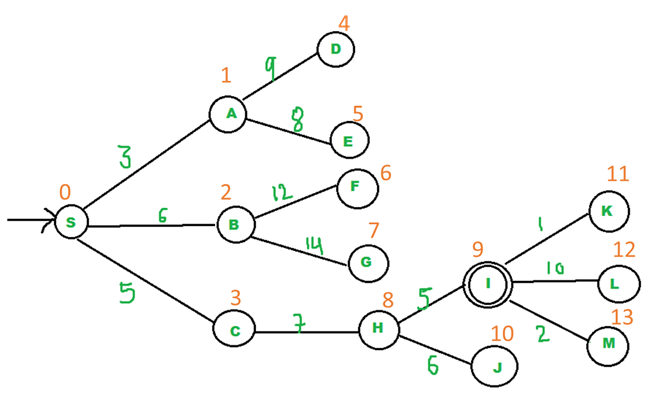

**Which route the best-first search travels by? Is it optimal?**



*   The worst-case complexity for the best-first search is, the search has to visit all nodes before reaching the goal. The priority queue uses Min(or Max) Heap, and insert and remove operations
*   The performance of the algorithm depends on how well the cost or evaluation function is designed.



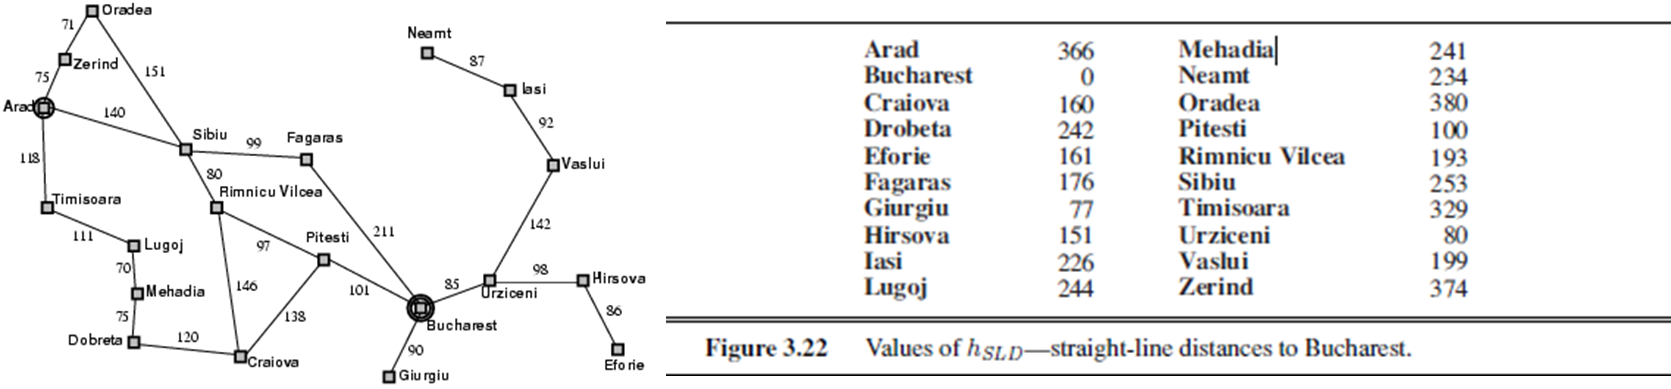

**Assignment 2 [10 points]**: modify the best-first search given above to implement the search for Romania map with the heuristic cost specified in the picture. Using Arad as initil node and Buchrest as the goal node.

In [22]:
# Implement your code here!!
best_first_search(romania_map, 0, 12, 20)

0-1 3 7 
1-2 
2-
7-8 
8-9 
9-10 
10-11 
11-5 6 
6-12 
12-


# Section2 - A* Search

---

# TO DO:
1. Study how the A* algorithm is working for 8-puzzle problem.
2. Try executing the given code. If you cannot execute the code using VSCode, copy the code to run on COLAB platform.
3. Answer questions

Practice(no point) Using the graph of Romania map to perform A* search as specified in the assignment 2


In [14]:
## The first part of code is to generate the child node using 'gen_successors' function

## 'h1' and 'h2' functions are for calculating heuristics cost
# 'h1' to calculate misplaced tile
# 'h2' to calculate manhattan distance

# Study how the code is process and test the functions by 'uncomment the 'print' command line

initial_state = '2170532486' #2170532486 4724506831
goal_state = '8123456780'

def h1(state,cost): # misplaced tile
  count = 0
  for i in range(1,10):
    if state[i] == '0':
      continue
    if state[i] != goal_state[i]:
      count += 1
  return count+cost

def manhattan(state,goal,ind):
  j = goal[1:].find(state[ind+1])
  rj = j//3
  cj = j%3
  ri = ind//3
  ci = ind%3
    # print(j,rj,cj,(i-1),ri,ci)
  return abs(rj-ri)+abs(cj-ci)

def h2(state,cost): # total Manhattan distance
  count = 0
  for i in range(1,10):
    if state[i] == '0':
      continue
    count += manhattan(state,goal_state,i-1)
  return count+cost

def gen_successors(node):
    last_index =0
    
    # (0,0,'4724506831', 0, 0, 0) == (parent_id,node_id,state,depth_level,cost,f)
    # ret += [(new_state,last_index+1,node[1],level+1,cost+1,h2(new_state,cost+1))]
    parent_id,node_id,state,depth_level,cost,f = node[0],node[1],node[2], node[3],node[4],node[5]
    ret = []
    pos_0 = int(state[0])
  
    puzzle = state[1:]
    if pos_0 % 3 != 0:
        new_state = str(pos_0-1) + puzzle[:pos_0-1] + puzzle[pos_0] + puzzle[pos_0-1] + puzzle[pos_0+1:]
        ret += [(node[1], last_index+1, new_state ,depth_level+1,cost+1,h1(new_state,cost+1))]
        # return (parent_id,node_id,state,depth_level,cost,f)
        last_index += 1
        #print('R'+new_state)
    if (pos_0+1) % 3 != 0:
        new_state = str(pos_0+1) + puzzle[:pos_0] + puzzle[pos_0+1] + puzzle[pos_0] + puzzle[pos_0+2:]
        ret += [(node[1], last_index+1, new_state ,depth_level+1,cost+1,h1(new_state,cost+1))]
        last_index += 1
        #print('L'+new_state)
    if pos_0 >= 3:
        new_state = str(pos_0-3) + puzzle[:pos_0-3] + puzzle[pos_0] + puzzle[pos_0-2:pos_0] + puzzle[pos_0-3] + puzzle[pos_0+1:]
        ret += [(node[1], last_index+1, new_state ,depth_level+1,cost+1,h1(new_state,cost+1))]
        last_index += 1
        #print('D'+new_state)
    if pos_0 <= 5:
        new_state = str(pos_0+3) + puzzle[:pos_0] + puzzle[pos_0+3] + puzzle[pos_0+1:pos_0+3] + puzzle[pos_0] + puzzle[pos_0+4:]
        ret += [(node[1], last_index+1, new_state ,depth_level+1,cost+1,h1(new_state,cost+1))]
        last_index += 1
        #print('U'+new_state)
    return ret


#---------------------------------#
# uncomment and try the 'gen_successors'
test = gen_successors([0,1,initial_state, 0, 0, 0]) #(parent_id,node_id,state,depth_level,cost,f)
print(h1(initial_state,0))
print(h2(initial_state,0))


6
10


In [13]:
last_index = 0
total_expanded_nodes = 0
total_nodes = 0

def is_goal(node):
    return node[2] == goal_state

def insert_all(node,myqueue):
    global total_nodes
    children = gen_successors(node)
    total_nodes += len(children)
    for child in children:
      inserted = False
      for j in range(len(myqueue)):
        if child[4] + child[5] < myqueue[j][4] + myqueue[j][5]:
          myqueue[j:j] = [child]
          inserted = True
          break
      if not inserted:
        myqueue.append(child)
      print(myqueue)

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[0]
    while True:
        print(current_node[2][1:4])
        print(current_node[2][4:7])
        print(current_node[2][7:])
        print()
        print(parent_index)
        parent_index = current_node[1]
        if parent_index == 0:
            break
        current_node = visited_node[parent_index]

def a_star_search(initial_node, goal_state):
    global last_index
    global visited_node
    global total_expanded_nodes
    last_index = 0
    myqueue = [initial_node]
    print(myqueue)
    visited_node = {}
    while True:
        if len(myqueue) == 0:
            print('Not Found')
            break
        current = myqueue[0]
        visited_node[current[1]] = current
        myqueue = myqueue[1:]
        total_expanded_nodes += 1
        if is_goal(current):
            #show_result(current,visited_node)
            print("Final state:", current[2])
            print()
            return
        insert_all(current,myqueue)

# Search
a_star_search([0,0, initial_state , 0, 0, 0], goal_state ) # (0,0,'04724506831', 0, 0, 0) == (parent_id,node_id,state,depth_level,cost,f)

print("Expanded nodes")
print(total_expanded_nodes)
print()
print("Total nodes")
print(total_nodes)


[[0, 0, '2170532486', 0, 0, 0]]
[[(0, 1, '1107532486', 1, 1, 7)]]


IndexError: list index out of range

**Assingment 3**: answer the following questions



1. According to the code given here, explain how the heuristic compares the state of the current node to the goal node. [4 points]

```
initial_state = '2170532486' #2170532486 4724506831
goal_state = '8123456780'

def h1(state,cost): # misplaced tile
  count = 0
  for i in range(1,10):
    if state[i] == '0':
      continue
    if state[i] != goal_state[i]:
      count += 1
  return count+cost
```

*ANSWER here...*
```
first : check postion of current state if it's == 0 (whether its empty spot or not) 
if it is 0, continue to next iteration
second : check whether postion of current state is == to goal state, 
if it is not, count += 1
then return count+cost
```

2. In the given code, **gen_successors(node)** function computes the Heusristic Cost using **h1()**, [2 points]

What's the output of your 'Expanded nodes"?

*ANSWER...*
11738

What's the output of your 'Total nodes"?

*ANSWER...*
32803

3. Change the code in **gen_successors(node)** function to compute the Heusristic Cost using **h2()**, Then execute a* search again. [4points]

What's the output of your 'Expanded nodes"?

*ANSWER...*
2806

What's the output of your 'Total nodes"?

*ANSWER...*
7669

**Challenge Practice**: Using the graph of Romania map to perform A* search
- Use the code of Romania graph in the best-first search and 'a_star_search' function for the Romania map to compute A* cost function

- you don't have to auto generate nodes, you can use the graph defined in the best-first search code.

